<a href="https://colab.research.google.com/github/UEPP40/PUM/blob/Romanowski/uczenie_nienadzorowane.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd

data = pd.read_csv("countries of the world.csv")

print(data.columns.values)

data.head()

['Country' 'Region' 'Population' 'Area (sq. mi.)'
 'Pop. Density (per sq. mi.)' 'Coastline (coast/area ratio)'
 'Net migration' 'Infant mortality (per 1000 births)' 'GDP ($ per capita)'
 'Literacy (%)' 'Phones (per 1000)' 'Arable (%)' 'Crops (%)' 'Other (%)'
 'Climate' 'Birthrate' 'Deathrate' 'Agriculture' 'Industry' 'Service']


,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [7]:
# Konwersja danych do odpowiedniego formatu liczbowego i czyszczenie
for col in data.columns[2:]:
    if data[col].dtype == 'object':
        data[col] = data[col].str.replace(',', '.').astype(float)

# Sprawdzanie brakujących wartości
missing_values = data.isnull().sum()

missing_values


Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

In [8]:
# Usuwanie brakujących wartości dla kolumn z niewielką liczbą braków
data.dropna(subset=['Net migration', 'Infant mortality (per 1000 births)', 'GDP ($ per capita)',
                    'Phones (per 1000)', 'Arable (%)', 'Crops (%)', 'Other (%)', 'Birthrate', 'Deathrate'], inplace=True)

# Wypełnienie medianą dla kolumn z większą liczbą brakujących wartości
for col in ['Literacy (%)', 'Climate', 'Agriculture', 'Industry', 'Service']:
    data[col].fillna(data[col].median(), inplace=True)

# Normalizacja danych
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_columns = data.columns[2:]  # Wybieramy tylko kolumny numeryczne
data_scaled = scaler.fit_transform(data[numeric_columns])
data_scaled = pd.DataFrame(data_scaled, columns=numeric_columns)

# Podgląd przygotowanych danych
data_scaled.head()


,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,0.009879,0.014467,-0.200146,-0.283811,4.691890,3.580117,-0.899653,-2.483334,-1.022910,-0.130417,-0.513842,0.369407,-1.685813,2.190547,2.201065,1.596280,-0.332709,-1.137412
1,-0.219276,-0.325673,-0.154798,-0.266649,-1.001743,-0.402734,-0.523386,0.155950,-0.721792,0.554829,-0.009388,-0.443019,1.308136,-0.629200,-0.806801,0.571173,-0.719697,0.105146
2,0.025501,0.967814,-0.220393,-0.283266,-0.078231,-0.135991,-0.374859,-0.706390,-0.691238,-0.811838,-0.510239,0.917609,-1.685813,-0.447425,-0.928150,-0.336184,2.346441,-1.649420
3,-0.248666,-0.341367,-0.056641,0.510128,-4.211658,-0.747418,-0.176824,0.704712,0.112040,-0.293315,1.261355,-0.411534,-0.188838,0.028950,-1.194720,-0.350037,-0.075957,0.008364
4,-0.248554,-0.341219,-0.138517,-0.283811,1.343651,-0.894295,0.912371,0.861501,1.164625,-0.888316,-0.540266,0.994777,1.308136,-1.202283,-0.601900,-0.350037,-0.075957,0.008364


In [9]:
from sklearn.cluster import KMeans

# K-means z k=3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)

# Przypisanie klastrów do danych
data['Cluster'] = kmeans.labels_

# Podgląd danych z przypisanym klastrami
data.head()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),...,Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Cluster
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,...,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.2400,0.3800,2
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,...,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.1880,0.5790,0
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,...,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.6000,0.2980,0
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,...,10.00,15.00,75.00,2.0,22.46,3.27,0.099,0.2745,0.5635,0
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,...,2.22,0.00,97.78,3.0,8.71,6.25,0.099,0.2745,0.5635,1


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

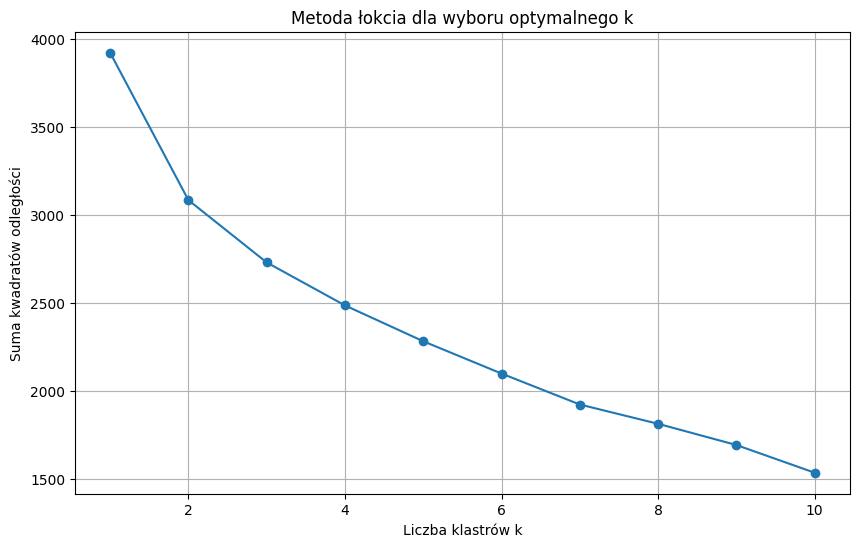

In [10]:
import matplotlib.pyplot as plt

# Obliczanie sumy kwadratów odległości wewnątrz klastrów dla różnych wartości k
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

# Wykres metody łokcia
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.title('Metoda łokcia dla wyboru optymalnego k')
plt.xlabel('Liczba klastrów k')
plt.ylabel('Suma kwadratów odległości')
plt.grid(True)
plt.show()


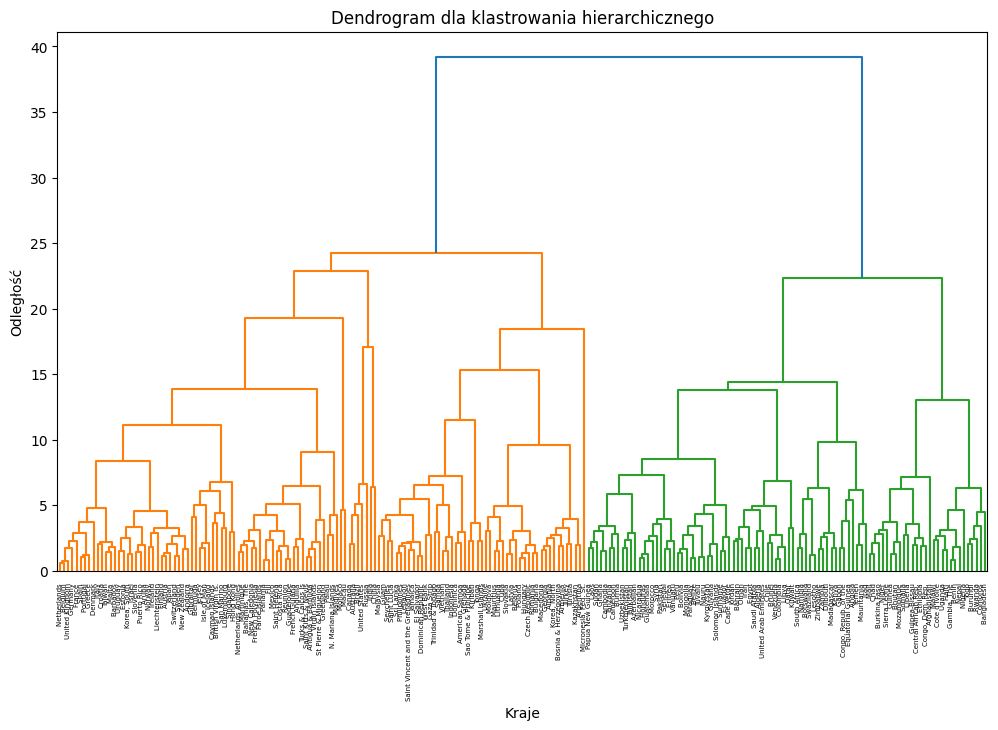

In [11]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Przygotowanie modelu hierarchicznego klastrowania
linked = linkage(data_scaled, method='ward')

# Rysowanie dendrogramu
plt.figure(figsize=(12, 7))
dendrogram(linked,
           orientation='top',
           labels=data['Country'].values,
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrogram dla klastrowania hierarchicznego')
plt.xlabel('Kraje')
plt.ylabel('Odległość')
plt.show()


In [18]:
cluster_distribution = data.groupby('Cluster')['Country'].apply(list)
pd.set_option('display.max_colwidth', None)

cluster_distribution

Cluster
0    [Albania , Algeria , American Samoa , Argentina , Armenia , Azerbaijan , Bahrain , Belize , Bolivia , Brazil , Brunei , Cape Verde , Chile , China , Colombia , Costa Rica , Cuba , Dominica , Dominican Republic , Ecuador , Egypt , El Salvador , Fiji , Gaza Strip , Georgia , Greenland , Grenada , Guatemala , Guyana , Honduras , India , Indonesia , Iran , Jamaica , Jordan , Kazakhstan , Kiribati , Korea, North , Kuwait , Kyrgyzstan , Lebanon , Libya , Macedonia , Malaysia , Maldives , Marshall Islands , Mexico , Micronesia, Fed. St. , Moldova , Mongolia , Morocco , Nauru , Nicaragua , Oman , Panama , Paraguay , Peru , Philippines , Puerto Rico , Qatar , Russia , Saint Helena , Saint Lucia , Saint Vincent and the Grenadines , Samoa , Sao Tome & Principe , Saudi Arabia , Seychelles , Solomon Islands , South Africa , Sri Lanka , Suriname , Syria , Thailand , Tonga , Trinidad & Tobago , Tunisia , Turkey , Turkmenistan , Tuvalu , Ukraine , United Arab Emirates , Uzbekistan , Venez